## Final Project Submission

Please fill out:
* Student name: Kamile Yagci
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL:

# King County House Sales Study

## Overview
In this project, I will analyze the King County House Sales. The Windermere Real Estate Agency hired me to develop a model to predict the house sale prices in King County. The agency plans to use the results of this study when advising their customers/homeowners on determining the value of their houses. They believe that the pricing the house correctly will increase the efficiency of sales. The agency also would like to learn about the effect of renovations on house sale prices, so they can advise the customers to do renovation or not. 

### Business Questions
* What are the main predictors for House Sale Price?
* Create a model to predict the House Sale Price.
* Do house renovation affects the Sale Price? 

## Data

I will use the King County Data for this study. The data contain the information about the houses sold in 2014-2015.

Let's load data and take a look.

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Checking the house sold date
df['date']=pd.to_datetime(df['date'])
df.sort_values(by=['date'], ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16580,9106000005,2015-05-27,1310000.0,4,2.25,3750,5000,2.0,0.0,0.0,...,8,2440,1310.0,1924,0.0,98115,47.6747,-122.303,2170,4590
13040,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0.0,0.0,...,6,720,670.0,1941,0.0,98115,47.6914,-122.308,920,6380
5632,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0.0,0.0,...,7,1870,0.0,1960,0.0,98007,47.5951,-122.144,1870,7650
15797,7129304540,2015-05-14,440000.0,5,2.00,1430,5600,1.5,0.0,0.0,...,6,1430,0.0,1947,0.0,98118,47.5192,-122.266,1860,5980
927,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0.0,0.0,...,8,1080,290.0,2009,0.0,98133,47.7052,-122.343,1370,1090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7316,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,0.0,0.0,...,7,1450,0.0,1954,0.0,98006,47.5746,-122.135,1260,8942
19661,7853220390,2014-05-02,785000.0,5,3.25,3660,11995,2.0,0.0,2.0,...,10,3660,0.0,2006,0.0,98065,47.5337,-121.860,3320,11241
6418,2011000010,2014-05-02,257950.0,3,1.75,1370,5858,1.0,NaN,0.0,...,7,1370,0.0,1987,0.0,98198,47.3815,-122.313,1400,7500
10689,2738600140,2014-05-02,499950.0,4,2.50,2860,3345,2.0,0.0,0.0,...,8,2190,670.0,2004,0.0,98072,47.7735,-122.158,2860,3596


The data includes houses sold between May 2014 to May 2015. It is about 12 months, 1 full year.

Let's list the types of the variables.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

Let's plot the distributions to get a better understanding on the variables.

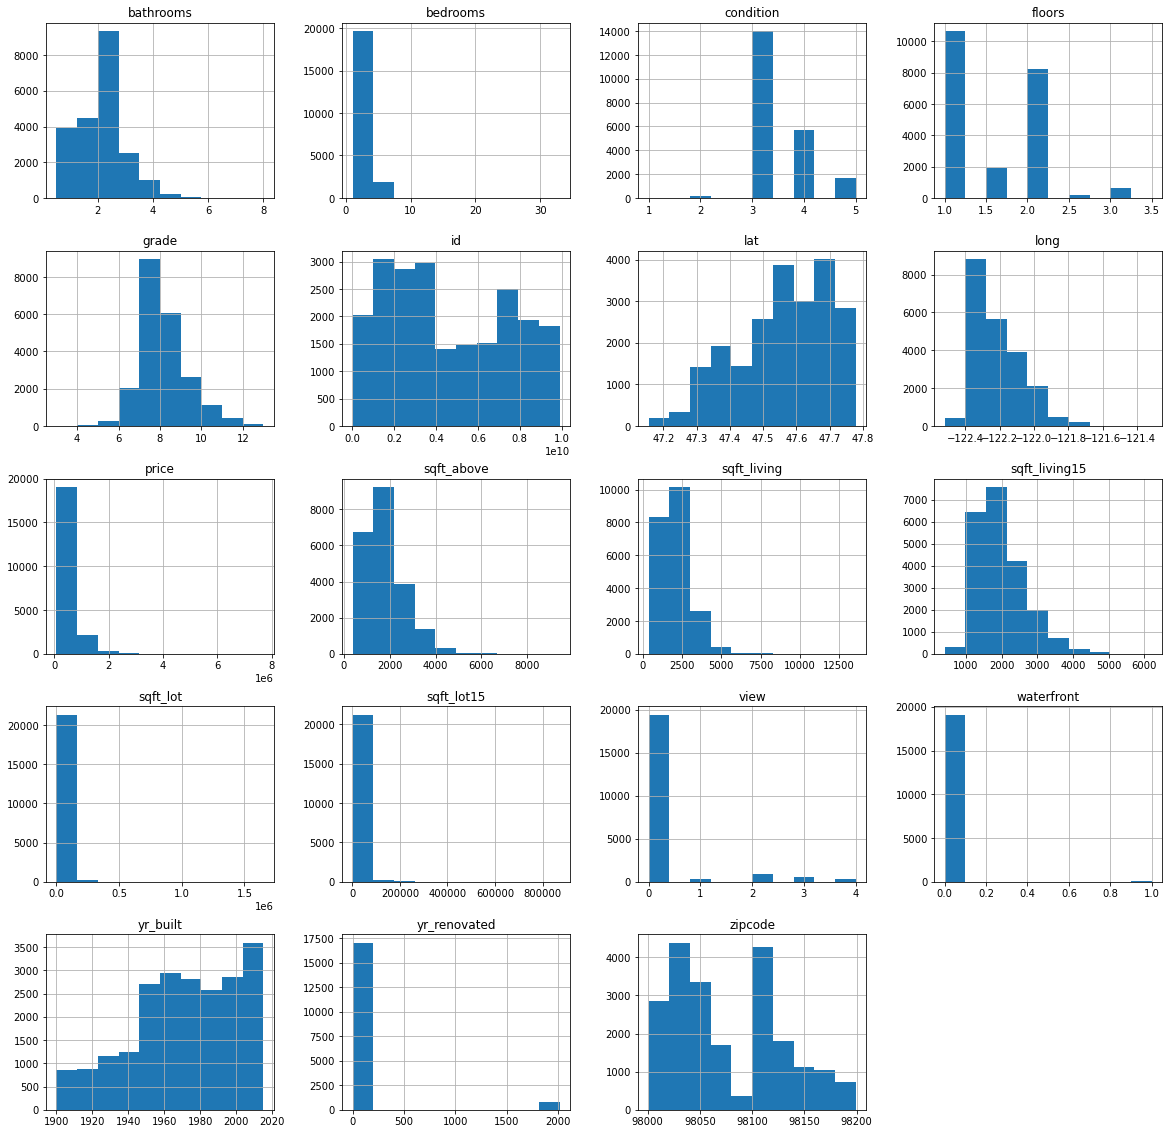

In [5]:
df.hist(figsize=(20, 20));
plt.savefig('figures/histograms.png')

Why 'sqft_basement' is not plotted?

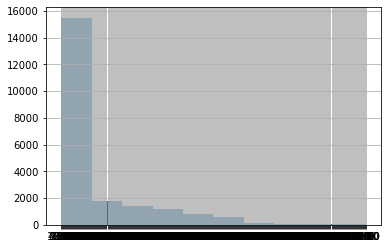

In [6]:
df['sqft_basement'].hist();

It looks like, there is some problem in 'sqft_basement' data. I'm not planning to use this variable, so I don't intend to dig in the issue.

The target varaible for this study is House Sale Price 'price'. Let's check the distribution closely.

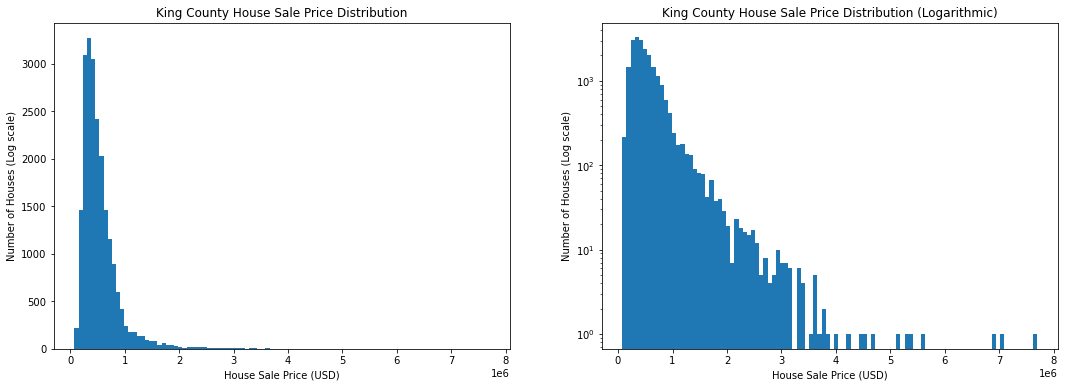

In [7]:
#Plot Sale price
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.hist(df['price'], bins=100)
ax1.set_xlabel("House Sale Price (USD)")
ax1.set_ylabel("Number of Houses (Log scale)")
ax1.set_title("King County House Sale Price Distribution");
#ax1.set_xlim(0, 4000000)

ax2.hist(df['price'], bins=100, log=True)
ax2.set_xlabel("House Sale Price (USD)")
ax2.set_ylabel("Number of Houses (Log scale)")
ax2.set_title("King County House Sale Price Distribution (Logarithmic)");

plt.savefig('figures/priceDist.png')

The 'price' looks like a left-skewed normal distribution. There are fewer houses above $3,000,000. I guess they will be outliers on the data.

### Data Cleaning

The Project 2 infomation page recommends to remove these columns to ease the analysis: ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

I will follow the advise and remove these variables except 'yr_renovated' and maybe 'zipcode'
* 'date' and 'view' are apparently not significant predictors for Sale Price; good to remove
* sqft_above' and 'sqft_basement' will have multicollinearity with 'sqft_living' (see hist plots); so better to remove
* 'lat' and 'long' determine the location; I will use the zipcode for location and so no need for these variables
* 'sqft_living15' and 'sqft_lot15' may have multicollinearity with 'sqft_living' and 'sqft_lot' (see hist plots); OK to remove 

One of my business question is about the effect of renovation on sale price; so needs to keep 'yr_renovated'

In general, location is an important factor in house prices. I want to take a closer look at 'zipcode', before making a decision on keeping it or not.

In [8]:
# How many zipcodes?
df['zipcode'].unique().size

70

In [9]:
# Group by zip code and aggragate
df_zip_sale = df.groupby('zipcode').agg(['mean', 'count'])['price']
df_zip_sale.columns = ['price_avg', 'count']

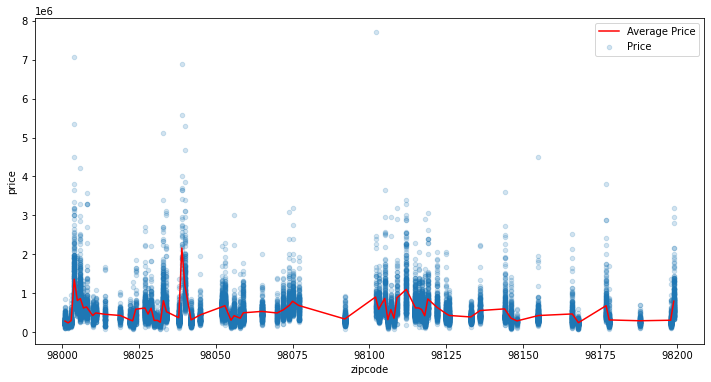

In [10]:
# Plot
df.plot.scatter(x='zipcode', y='price', figsize=(12,6), alpha=0.2, label='Price')
df_zip_sale['price_avg'].plot(color='red', label='Average Price')
plt.legend()
#plt.legend(prop={"size":10})
plt.savefig('figures/price-vs-zipCode.png')

In [11]:
# Sort by average price per zipcode
df_zip_sale.sort_values(by='price_avg', ascending=False).head(10)

,price_avg,count
zipcode,,
98039,2.161300e+06,50
98004,1.356524e+06,317
98040,1.194874e+06,282
98112,1.096239e+06,269
98102,8.996077e+05,104
98109,8.800778e+05,109
98105,8.632289e+05,229
98006,8.599386e+05,498
98119,8.497148e+05,184


The price vs zipcode graph shows that the house prices peak at few zipcodes. The ordered list also shows that 4 out of 70 zipcodes have higher average sale price than others. How significant is this?

I decided to keep 'zipcode' in my data.

Let's drop the uninterested columns and handle the missing data.

In [12]:
# Drop columns
columns_to_delete = ['date', 'view', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
df2 = df.drop(columns_to_delete, axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21597 non-null  int64  
 1   price         21597 non-null  float64
 2   bedrooms      21597 non-null  int64  
 3   bathrooms     21597 non-null  float64
 4   sqft_living   21597 non-null  int64  
 5   sqft_lot      21597 non-null  int64  
 6   floors        21597 non-null  float64
 7   waterfront    19221 non-null  float64
 8   condition     21597 non-null  int64  
 9   grade         21597 non-null  int64  
 10  yr_built      21597 non-null  int64  
 11  yr_renovated  17755 non-null  float64
 12  zipcode       21597 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 2.1 MB


In [13]:
df2.isna().sum()

id                 0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2376
condition          0
grade              0
yr_built           0
yr_renovated    3842
zipcode            0
dtype: int64

In [14]:
#Check waterfront unique values
df2['waterfront'].unique()

array([nan,  0.,  1.])

The 'waterfront' nan value most probably means that house is not on the waterfront. It is reasonable to assign zero to missing data for these varaibles.

In [15]:
df2['waterfront'].fillna(0., inplace=True)

In [16]:
#Check renovation unique values
df2['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

The zero and 'nan' values in 'yr_renovated' means that the house is not renovated. I will replace them with the 'yr_built', since yr_built can be considered as the last renovation. However, I will like to keep a booelan variable for 'yr_renovated'.

In [17]:
df2.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0,98178
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,NaN,98028
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074


In [18]:
# Fill null with 0, create a boolean column, and replace 0 with yr_built
df2['yr_renovated'].fillna(0., inplace=True)
df2['yr_renovated_bool'] = df2['yr_renovated'] != 0
df2['yr_renovated'].replace(0, df2['yr_built'], inplace=True)
df2.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,yr_renovated_bool
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,1955.0,98178,False
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125,True
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,1933.0,98028,False
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,1965.0,98136,False
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,1987.0,98074,False


In [19]:
df2.isna().sum()

id                   0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
condition            0
grade                0
yr_built             0
yr_renovated         0
zipcode              0
yr_renovated_bool    0
dtype: int64

### Correlation
Let's draw the correlation heat map to see the correlations between varaibles.

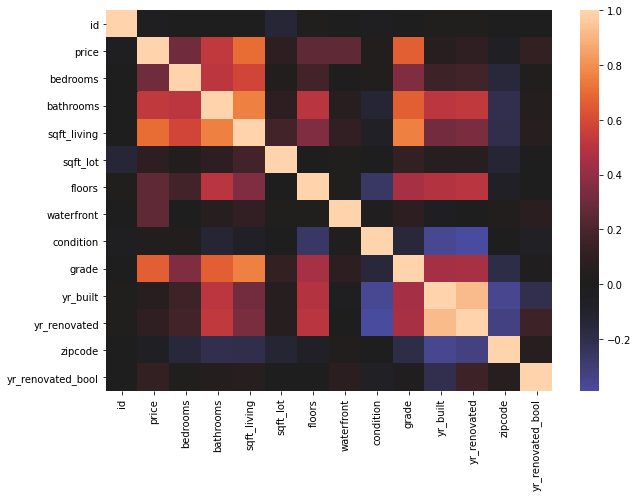

In [20]:
#Plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df2.corr(), center=0);
plt.savefig('figures/heatMap.png')

Scatter graph shows good correlation between Price and (bedrooms, bathrooms, sqft_living, grade).

There is also correlation among bedrooms, bathrooms, sqft_living, grade. We have to consider multicollinearity effects using them in modeling. I should only use one of them in my model.

There is also high correlation between yr_renovated and yr_built. Again, only one of them can be used in my model.

In [21]:
# Correlation values between price and other variables
df2.corr()['price']

id                  -0.016772
price                1.000000
bedrooms             0.308787
bathrooms            0.525906
sqft_living          0.701917
sqft_lot             0.089876
floors               0.256804
waterfront           0.264306
condition            0.036056
grade                0.667951
yr_built             0.053953
yr_renovated         0.097541
zipcode             -0.053402
yr_renovated_bool    0.117543
Name: price, dtype: float64

The variables that have highest correlation with Sale Price are 'sqft_living' and 'grade'.
Definition of these variables:
* sqft_living: square footage of the home (continious variable_
* grade: overall grade given to the housing unit, based on King County grading system (categorical varible)

### hot-encoding for 'zipcode'
I decided to keep zipcode in my dataframe since I believe location has a considerable effect on sale price. I want to investigate it.
Zipcode is a categorical variable, therefore I will use dummy indexing and create a seperate column for each zip code. It will increase the number of columns, but I belive it worths.

In [22]:
zipcodes = pd.get_dummies(df2['zipcode'], prefix='zip', drop_first=True)
df3 = pd.concat([df2, zipcodes], axis=1)
df3.drop('zipcode', axis=1, inplace=True)
df3.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built',
       'yr_renovated', 'yr_renovated_bool', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022',
       'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034',
       'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103',
       'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133',



## Modeling

My main goal for this project is predicting the House Sale Price. Therefore 'price' variable is my target dependent varaible (X). And all other variables are predictors, independent variables (y). 

This modeling process will tell me which variables are good predictors and produce a fit algorithm which calculates the predicted sale price.

I will use multiple linear regression for this study.

In [23]:
y = df3['price'] # Target, dependent variable
X = df3.drop('price', axis=1) # Predictors, independent variables

### Baseline Model

I will start the modeling with only one variable. Then I will try to improve my baseline model by adding more variables step by step.

Based on my correlation study, the Sale price has best correlation with 'sqft_living' and 'grade'.

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

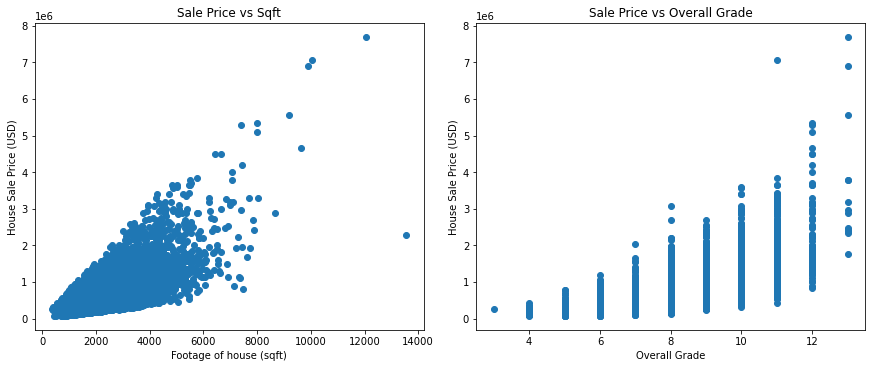

In [25]:
#Plot Sale price vs top  two predictors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

ax1.scatter(X['sqft_living'], y)
ax1.set_xlabel("Footage of house (sqft)")
ax1.set_ylabel("House Sale Price (USD)")
ax1.set_title("Sale Price vs Sqft");
#ax1.set_xlim(0, 4000000)

ax2.scatter(X['grade'], y)
ax2.set_xlabel("Overall Grade")
ax2.set_ylabel("House Sale Price (USD)")
ax2.set_title("Sale Price vs Overall Grade");
plt.savefig('figures/price-vs-sqftGrade.png')

The high correltaion is visible on both plots.

I choose to use 'sqft_living' in my baseline model since it is a continious variable.

**There are three steps in modeling:** 
1. Seperate data into train and test splits.
2. Apply Linear Fit to training data and make predictions
3. Compare/validate predictions on test data

I plan to use 80% of the data for training and 20% for testing.

In [26]:
# Seperate data into training and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 16197 rows and 81 columns
y_train is a Series with 16197 values


In [27]:
# Apply linear fit, predict, and validate
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

X_train_sqft = X_train[['sqft_living']]
X_test_sqft = X_test[['sqft_living']]

regline = baseline_model.fit(X_train_sqft, y_train)

y_train_hat = baseline_model.predict(X_train_sqft)
y_test_hat = baseline_model.predict(X_test_sqft)

print("Slope:", regline.coef_)
print("y-intercept:", regline.intercept_)
print("R squared for Training:", regline.score(X_train_sqft, y_train))
print("R squared for Testing:", regline.score(X_test_sqft, y_test))

Slope: [285.58593563]
y-intercept: -53321.493253810564
R squared for Training: 0.4951005996564265
R squared for Testing: 0.48322207729033984


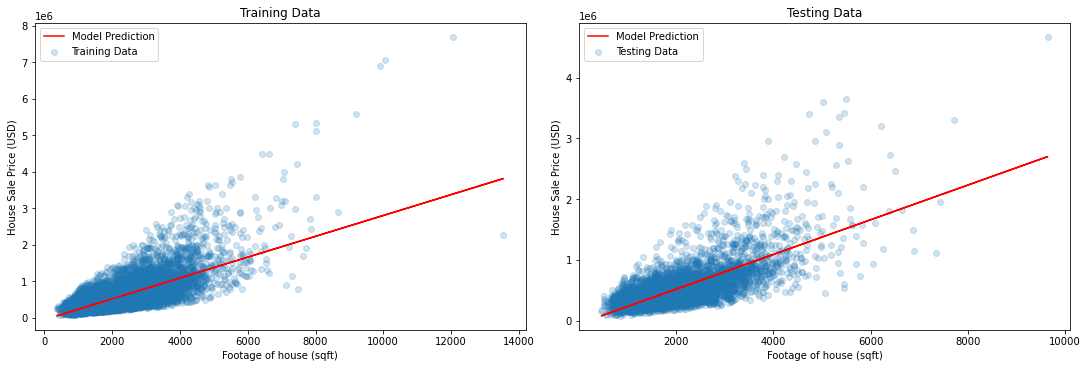

<Figure size 432x288 with 0 Axes>

In [28]:
#Visualization of fit on training and testing data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)

ax1.scatter(X_train_sqft, y_train, label='Training Data', alpha=0.2)
ax1.plot(X_train_sqft, y_train_hat, color='red', label='Model Prediction')
ax1.set_xlabel("Footage of house (sqft)")
ax1.set_ylabel("House Sale Price (USD)")
ax1.set_title("Training Data")
ax1.legend()

ax2.scatter(X_test_sqft, y_test, label='Testing Data', alpha=0.2)
ax2.plot(X_test_sqft, y_test_hat, color='red', label='Model Prediction')
ax2.set_xlabel("Footage of house (sqft)")
ax2.set_ylabel("House Sale Price (USD)")
ax2.set_title("Testing Data")
ax2.legend()

plt.show()
plt.savefig('figures/baselineFit_sqft.png')

The R squared score for training and test scores are similar. The Training and Testing graphs also show similar fitting behavior.
Therefore, we can say that the baseline model is a good fit, not overfitted or underfitted.

**Model Validation with Multiple splits of data**

Seperating the data in training and test splits is a random process. We can improve the validation by repeating the process (split, fit, predict, compare) multiple times and finding the mean R squared scores.


In [51]:
# Split, fit and validate for multiple split sets
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X[['sqft_living']],
    y=y,
    return_train_score=True,
    cv=splitter
)

print("Mean R squared for Training:     ", baseline_scores["train_score"].mean())
print("Mean R squared for Testing:", baseline_scores["test_score"].mean())

Mean R squared for Training:      0.4911536443241339
Mean R squared for Testing: 0.49607012939083434


As the number of splits increase, the difference between the Train and Test score decreases. 

The R squared value for baseline model with one predictor (sqft_living) is around 0.49. However, the score is not high enough. We should try to improve our model by adding more predictors.

### Second Model with 2 predictors

In the second model, I plan to add a second predictor to my fit in order to improve the R squared score. 

First I will iterate over all the remaining predictors to find the best 2nd predictor.

I will remove the 'sqft_living' and its correlated variables ('bedrooms', 'bathrooms', 'grade') from my predictor list.

In [30]:
# Remove correlated predictors and sqft_living
predictors_left = list(set(list(X.columns)) - set(['sqft_living', 'bedrooms', 'bathrooms', 'grade']))
print(predictors_left)

['zip_98117', 'sqft_lot', 'zip_98052', 'zip_98007', 'zip_98072', 'zip_98108', 'zip_98136', 'zip_98092', 'zip_98031', 'zip_98199', 'zip_98034', 'zip_98070', 'zip_98059', 'zip_98155', 'id', 'zip_98003', 'zip_98107', 'zip_98005', 'zip_98024', 'zip_98105', 'zip_98168', 'zip_98115', 'zip_98102', 'zip_98126', 'yr_built', 'zip_98055', 'zip_98116', 'zip_98133', 'zip_98033', 'zip_98177', 'zip_98144', 'zip_98053', 'zip_98023', 'zip_98077', 'zip_98040', 'zip_98006', 'zip_98002', 'zip_98028', 'zip_98011', 'zip_98065', 'zip_98148', 'zip_98119', 'zip_98056', 'zip_98038', 'zip_98045', 'zip_98042', 'zip_98058', 'zip_98008', 'zip_98112', 'zip_98029', 'zip_98188', 'zip_98146', 'condition', 'zip_98022', 'zip_98125', 'floors', 'zip_98166', 'zip_98118', 'zip_98039', 'zip_98198', 'zip_98075', 'zip_98014', 'zip_98106', 'zip_98010', 'zip_98004', 'zip_98032', 'zip_98178', 'zip_98030', 'zip_98109', 'zip_98103', 'yr_renovated_bool', 'zip_98027', 'zip_98074', 'zip_98122', 'waterfront', 'yr_renovated', 'zip_98019'

In [31]:
# Find the 2nd best predictor
second_model = LinearRegression()

selected_predictors = []
R_squared_train = []
R_squared_test = []

for col in predictors_left:
    pred = ['sqft_living'] + [col]
    second_model.fit(X_train[pred], y_train)
    R2_train = second_model.score(X_train[pred], y_train)
    R2_test = second_model.score(X_test[pred], y_test)
    selected_predictors.append(pred)
    R_squared_train.append(R2_train)
    R_squared_test.append(R2_test)

df_two_predictors = pd.DataFrame(list(zip(selected_predictors, R_squared_train, R_squared_test)), \
                                 columns=['two_predictors', 'R_squared_train', 'R_squared_test'])
df_two_predictors.sort_values('R_squared_train', ascending=False, inplace=True, ignore_index=True)
df_two_predictors.head(15)

,two_predictors,R_squared_train,R_squared_test
0,"[sqft_living, zip_98004]",0.533440,0.520127
1,"[sqft_living, waterfront]",0.529563,0.528285
2,"[sqft_living, yr_built]",0.526124,0.518243
3,"[sqft_living, zip_98039]",0.517281,0.506499
4,"[sqft_living, yr_renovated]",0.516954,0.507128
5,"[sqft_living, zip_98112]",0.511713,0.506115
6,"[sqft_living, zip_98040]",0.508561,0.496405
7,"[sqft_living, zip_98023]",0.504133,0.492635
8,"[sqft_living, zip_98038]",0.502710,0.491157
9,"[sqft_living, zip_98042]",0.502537,0.492249


Adding a 2nd predictor to baseline model improved the R squared value both on training and testing data.

As I guessed, zipcode plays a significant role in House Sale price.

The R_squared values for top 2nd predictors are very close to each other. Moreover, model validation on test data is also good for all. 

I will not choose a 2nd predictor for this step. Instead I will search for the best set of predictors.

### Third Model with 3 predictors
In this step, I will try to find the best set of 2nd and 3rd predictors in addition to the 'sqft_living'.

In [32]:
from itertools import combinations

third_model = LinearRegression()

selected_predictors = []
R_squared_train = []
R_squared_test = []

for (col1, col2) in list(combinations(predictors_left, 2)):
    pred = ['sqft_living'] + [col1, col2]
    third_model.fit(X_train[pred], y_train)
    R2_train = third_model.score(X_train[pred], y_train)
    R2_test = third_model.score(X_test[pred], y_test)
    selected_predictors.append(pred)
    R_squared_train.append(R2_train)
    R_squared_test.append(R2_test)

df_three_predictors = pd.DataFrame(list(zip(selected_predictors, R_squared_train, R_squared_test)), \
                                 columns=['three_predictors', 'R_squared_train', 'R_squared_test'])
df_three_predictors.sort_values('R_squared_train', ascending=False, inplace=True, ignore_index=True)
df_three_predictors.head(15)

,three_predictors,R_squared_train,R_squared_test
0,"[sqft_living, zip_98004, waterfront]",0.569135,0.566727
1,"[sqft_living, yr_built, zip_98004]",0.562154,0.552604
2,"[sqft_living, yr_built, waterfront]",0.556858,0.558546
3,"[sqft_living, zip_98039, zip_98004]",0.556583,0.544304
4,"[sqft_living, zip_98004, yr_renovated]",0.553657,0.543087
5,"[sqft_living, zip_98039, waterfront]",0.551630,0.552382
6,"[sqft_living, zip_98112, zip_98004]",0.551043,0.544249
7,"[sqft_living, waterfront, yr_renovated]",0.549054,0.549292
8,"[sqft_living, zip_98040, zip_98004]",0.548339,0.534251
9,"[sqft_living, yr_built, zip_98039]",0.546934,0.539806


As the number of the predictors increase, R squared value increased. The validation is still good.

The predictors sets which includes variables "sqft_living, waterfront, zip_98004, yr_built, and zip_98039" give similar R_squared values for training and test.

### Final Model with 5 predictors
In final model, I will use all the top 5 predictors to see how much our fit improves.

In [52]:
final_model = LinearRegression()

five_pred = ['sqft_living', 'waterfront', 'yr_built', 'zip_98004', 'zip_98039']

X_train_final = X_train[five_pred]
X_test_final = X_test[five_pred]

regline = final_model.fit(X_train[five_pred], y_train)

print('Final model predictors:', five_pred)
print("R squared for Training:", regline.score(X_train_final, y_train))
print("R squared for Testing:", regline.score(X_test_final, y_test))

Final model predictors: ['sqft_living', 'waterfront', 'yr_built', 'zip_98004', 'zip_98039']
R squared for Training: 0.6159271322430281
R squared for Testing: 0.6178922353975156


As I guessed, adding more zipcodes will improve the model. However, I stop adding here.

Validation looks pretty good.

Let's double check the validation with multisplitter.

In [53]:
splitter = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

final_model2 = LinearRegression()

final_scores = cross_validate(
    estimator=final_model2,
    X=X[five_pred],
    y=y,
    return_train_score=True,
    cv=splitter
)

print('Final model predictors:', five_pred)
print("Mean R squared for Training:     ", final_scores["train_score"].mean())
print("Mean R squared for Testing:", final_scores["test_score"].mean())

Final model predictors: ['sqft_living', 'waterfront', 'yr_built', 'zip_98004', 'zip_98039']
Mean R squared for Training:      0.6135724222328819
Mean R squared for Testing: 0.6256321951893684


The multisplitted results mainly agree with the one split process. The difference is probably random.

For our final model, R squared score is acceptable. The model performance on training data is similar to test data. We conclude that there is no overfitting or underfitting.

### RMSE calculation

In [55]:
#Calculate MSE and RMSE
from sklearn.metrics import mean_squared_error

#mean_squared_error(y_test, final_model.predict(X_test_final), squared=False) # gives RMSE
mse = mean_squared_error(y_test, final_model.predict(X_test_final)) # gives MSE
rmse = np.sqrt(mse)
print('MSE =', mse)
print('RMSE =', rmse)

MSE = 45489203300.832375
RMSE = 213281.9807223113


RMSE value is quite large. This is not a good sign.

We can also use statmodels for multiple linear regression modeling.

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [36]:
outcome = 'price'

#pred_sum = '+'.join(X.columns)
pred_sum = '+'.join(five_pred)
#pred_sum = '+'.join(['sqft_living', 'waterfront', 'yr_built'])
#pred_sum = '+'.join(['sqft_living', 'waterfront', 'zip_98004', 'zip_98039'])
#pred_sum = '+'.join(['sqft_living'])

formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     6946.
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:25:05   Log-Likelihood:            -2.9704e+05
No. Observations:               21597   AIC:                         5.941e+05
Df Residuals:                   21591   BIC:                         5.941e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.004e+06   1.09e+05     36.819      0.000    3.79e+06    4.22e+06
sqft_living   279.9645      1.812    154.525      0.000     276.413     283.516
waterfront   8.381e+05    1.9e+04     44.032      0.000    8.01e+05    8.75e+05
yr_built    -2061.3388     55.749    -36.975      0.000   -2170.611   -1952.067
zip_98004    5.997e+05    1.3e+04     46.260      0.000    5.74e+05    6.25e+05
zip_98039    1.143e+06   3.24e+04     35.317      0.000    1.08e+06    1.21e+06
==============================================================================
Omnibus:                    11494.937   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           321015.318
Skew:                           2.012   Prob(JB):                         0.00
Kurtosis:                      21.454   Cond. No.                     2.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I did run the Statmodel OLS on different set of predictors. Here are my findings:
* As the number of predictors used increase the R squared value increases. However, also the conditon number increases, which is not good
* R_squared = 0.795 and Cond. No. = 6.17e+11 when all predictors used (including hot-encoded zipcode and boolean yr_renovated).
* R_squared = 0.617 Cond. No. = 2.07e+05  when five final model predictors used ('sqft_living', 'waterfront', 'yr_built', 'zip_98004', 'zip_98039').
* R_squared = 0.592 Cond. No. = 4.75e+04  when four predictors used ('sqft_living', 'waterfront', 'zip_98004', 'zip_98039').
* R_squared = 0.493 Cond. No. = 5.63e+03 when one predictor, 'sqft_living', used

It is also interesting to note that 'yr_built' has negative coefficient.

### Effect of House Renovations
I would like to see if and how much house renovations effect the House Sale Prices. 
Let's apply the linear fit with one predictor only: 'yr_renovated'.


In [38]:
renovation_model = LinearRegression()

X_train_ren = X_train[['yr_renovated']]
X_test_ren = X_test[['yr_renovated']]

regline = renovation_model.fit(X_train_ren, y_train)

print("Slope:", regline.coef_)
print("y-intercept:", regline.intercept_)
print("R squared for Training:", regline.score(X_train_ren, y_train))
print("R squared for Testing:", regline.score(X_test_ren, y_test))

Slope: [1300.35687138]
y-intercept: -2022535.979409572
R squared for Training: 0.010206187304151793
R squared for Testing: 0.006126113636745867


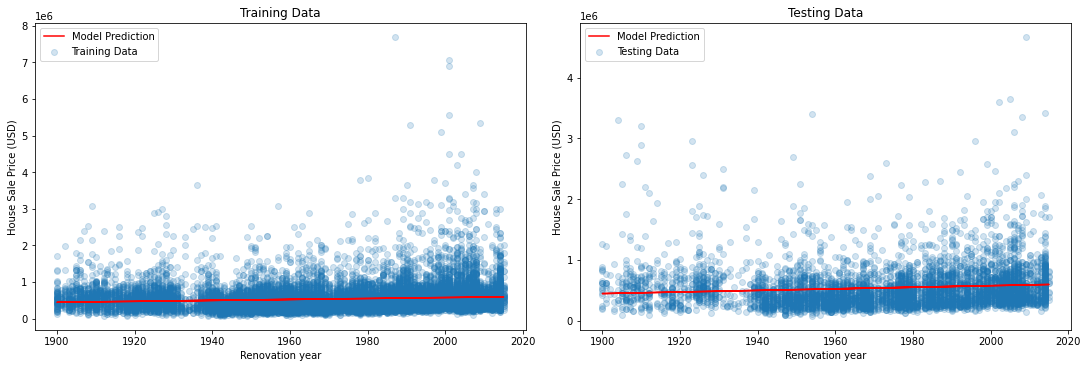

<Figure size 432x288 with 0 Axes>

In [39]:
#Visualization of yr_renovation fit on training and testing data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)

ax1.scatter(X_train_ren, y_train, label='Training Data', alpha=0.2)
ax1.plot(X_train_ren, regline.predict(X_train_ren), color='red', label='Model Prediction')
ax1.set_xlabel("Renovation year")
ax1.set_ylabel("House Sale Price (USD)")
ax1.set_title("Training Data")
ax1.legend()

ax2.scatter(X_test_ren, y_test, label='Testing Data', alpha=0.2)
ax2.plot(X_test_ren, regline.predict(X_test_ren), color='red', label='Model Prediction')
ax2.set_xlabel("Renovation year")
ax2.set_ylabel("House Sale Price (USD)")
ax2.set_title("Testing Data")
ax2.legend()

plt.show()
plt.savefig('figures/baselineFit_sqft.png')

R squared value is very low. Apparently this is not a good fit. 

I will now apply the linear regression on final model predictors + renovation year. I want to observe how much the R squared will improve.

In [40]:
# Linear fit on final model + renovation predictors
final_model_ren = LinearRegression()

pred = ['sqft_living', 'waterfront', 'yr_built', 'zip_98004', 'zip_98039', 'yr_renovated']

regline_ren = final_model_ren.fit(X_train[pred], y_train)

print('Final model + Renovation predictors:', pred)
print("R squared for Training:", regline_ren.score(X_train[pred], y_train))
print("R squared for Testing:", regline_ren.score(X_test[pred], y_test))

Final model + Renovation predictors: ['sqft_living', 'waterfront', 'yr_built', 'zip_98004', 'zip_98039', 'yr_renovated']
R squared for Training: 0.6167249032808759
R squared for Testing: 0.618146687048683


Renovation does improve the R squared score slightly on training data, but not on testing data.

I conclude that House Renovation doesn't have significant effect on House Sale Price.

## Final Model Interpretation
Here is the parameters for my final model:

In [41]:
print(pd.Series(final_model.coef_, index=five_pred, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

sqft_living    2.844667e+02
waterfront     8.040627e+05
yr_built      -2.071868e+03
zip_98004      6.201505e+05
zip_98039      1.162237e+06
Name: Coefficients, dtype: float64

Intercept: 4014990.7576159136


Observations:
* The y-intercept is quite large, about 4,000,000, and the price goes down with year_built. 
* The 'year_built' has negative coefficient, which is interesting. The old houses are more expensive than the new ones. Are the old, established neigborhoods more valuable? Are old neighborhoods close to downtown? Why? This can be investigated for future study.

Here is the linear equation for our final model:

House Sale Price = 4014990.7576159136 + (2.844667e+02 * sqft_living) + (8.040627e+05 * waterfront) + (-2.071868e+03 * yr_built) + (6.201505e+05 * zip_98004) + (1.162237e+06 * zip_98039)

In general, the format of the linear equation:
* y = b + mx (for one independent variable)
* y = b + m1x1 + m2x2 + m3x3 + m4x4 + m4x5 (for five independent varibles)

(where m is slope/coefficient, and b is y-intercept)

Let's write a small function to calculate the house sale price.

In [42]:
# House sale price function based on final model
def house_sale_price(sqft_l, water_f, yr_b, zip004, zip039):
    m=final_model.coef_
    b=final_model.intercept_
    sale_price = b + m[0]*sqft_l + m[1]*water_f + m[2]*yr_b + m[3]*zip004 + m[4]*zip039
    return sale_price

In [43]:
#testing my final model function
print('1:', house_sale_price(2800, 0, 1978, 0, 0)) # control set
print('2:', house_sale_price(4200, 0, 1978, 0, 0)) # sqft_living effect
print('3:', house_sale_price(2800, 1, 1978, 0, 0)) # waterfront effect
print('4:', house_sale_price(2800, 0, 2015, 0, 0)) # year_built effect
print('5:', house_sale_price(2800, 0, 1978, 1, 0)) # zipcode 98004 effect
print('6:', house_sale_price(2800, 0, 1978, 0, 1)) # zipcode 98039 effect


1: 713342.1052993718
2: 1111595.4730236786
3: 1517404.8278655098
4: 636682.9802501751
5: 1333492.6308398792
6: 1875578.8361759782


### Investigating Linearity
I will check the linearity between the model predicted value and actual value on the test data.

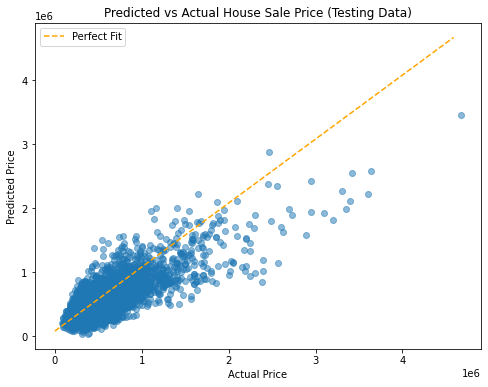

In [44]:
# Plotting Predicted vs Actual Sale Price
y_pred = final_model.predict(X_test_final)
fig, ax = plt.subplots(figsize=(8,6))

perfect_line = np.arange(y_test.min(), y_test.max())
#perfect_line = np.arange(1000000, 3000000)
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, y_pred, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title('Predicted vs Actual House Sale Price (Testing Data)')
ax.legend(loc='upper left');
plt.savefig('figures/linearityCheck.png')


* The plot shows linear relation between the Actual and Predicted price.
* However, it is important to note that, at high sale prices (above 2,000,000), the predicted value is deflecting away from the perfect fit. I believe these are outliners.

I conclude that Linearity assumption holds for the majority of the data, except outliers at high sale prices.

### Investigating Normality
We will check normality by plotting the residual distribution vs normal distribution.

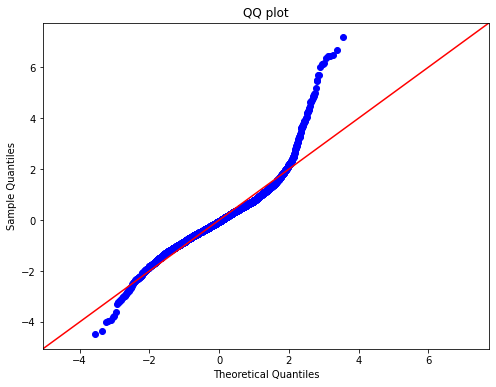

In [45]:
# QQ Plot
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(8,6))

residuals = (y_test - y_pred)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=ax);
ax.set_title('QQ plot');
plt.savefig('figures/normalityCheck_QQ.png')

* The data looks like normal distribution close to center, but it is skewed at the tails.
* I believe skewness is caused by the outliners at the high sale prices.

Let's look at the residual distributions closely.

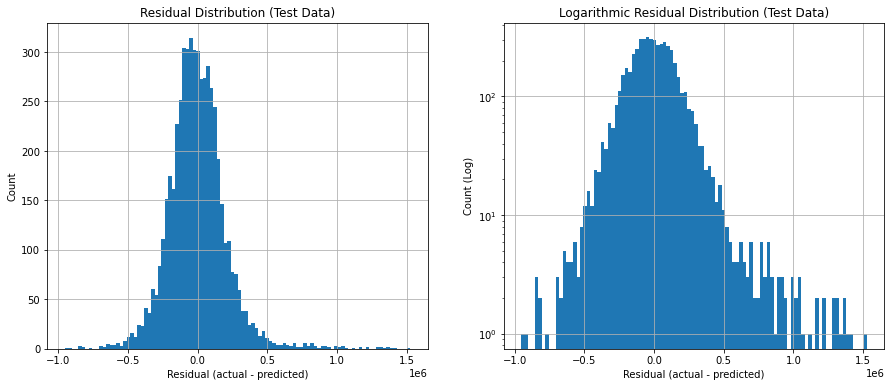

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

residuals.hist(bins=100, ax=ax1)
ax1.set_title("Residual Distribution (Test Data)")
ax1.set_xlabel('Residual (actual - predicted)')
ax1.set_ylabel('Count')

residuals.hist(bins=100, ax=ax2, log=True)
ax2.set_title("Logarithmic Residual Distribution (Test Data)")
ax2.set_xlabel('Residual (actual - predicted)')
ax2.set_ylabel('Count (Log)')
plt.savefig('figures/residualDist.png')

Residual distribution looks normal except on the tails. The data in tails causes a bit skewness. I believe the residual values on the tails are caused by outliers, the houses at high sale prices.

I conclude that Normality assumption holds for the majority of the data, except outliers at high sale prices.

### Investigating Multicollinearity (Independence Assumption)

In [47]:
# VIF test
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

sqft_living    6.460982
waterfront     1.019214
yr_built       6.320784
zip_98004      1.029405
zip_98039      1.010471
Name: Variance Inflation Factor, dtype: float64

* The VIF values for variables, 'waterfront' 'zip_98004', 'zip_98004' are around 1. They are not correlated.
* However, the VIF values are around 6.4 for sqft_living and yr_built. These variables look correlated and causes multicollinearity.

I conclude that Independence Assumption is violated since significant multicollinearity is observed.

In [48]:
# Correlation between sqft_living and yr_built
X_train_final['sqft_living'].corr(X_train_final['yr_built'])

0.32159976002317686

Even though the correlation is not high for the sqft_living and yr_built, it still caused considerable multicollinearity.

Why are they correlated?

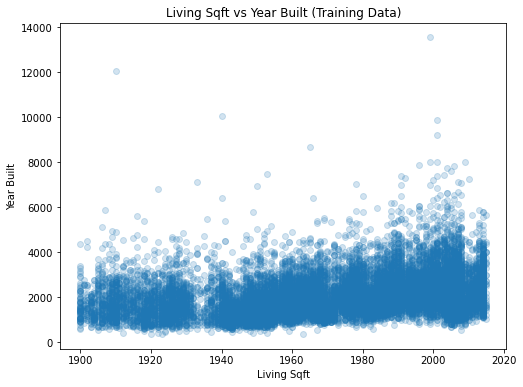

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_final['yr_built'], X_train_final['sqft_living'], alpha=0.2)
plt.title("Living Sqft vs Year Built (Training Data)")
plt.xlabel('Living Sqft')
plt.ylabel('Year Built')
plt.savefig('figures/yearBuilt-vs-sqft.png')

The plot shows slight correlation. The new houses looks like a bit larger.

The 'sqft_living' and 'yr_built' are main predictors. Should I remove 'year_built' from model? But It will decrease the R squared.

From Statmodel OLS fit:
* R_squared = 0.617 Cond. No. = 2.07e+05 when five final model predictors used ('sqft_living', 'waterfront', 'yr_built', 'zip_98004', 'zip_98039').
* R_squared = 0.592 Cond. No. = 4.75e+04 when four predictors used ('sqft_living', 'waterfront', 'zip_98004', 'zip_98039').

### Investigating Homoscedasticity
I will look at the Residual vs Predicted values for house prices on testing data. The shape of the graph will tell me about the Homoscedasticity.

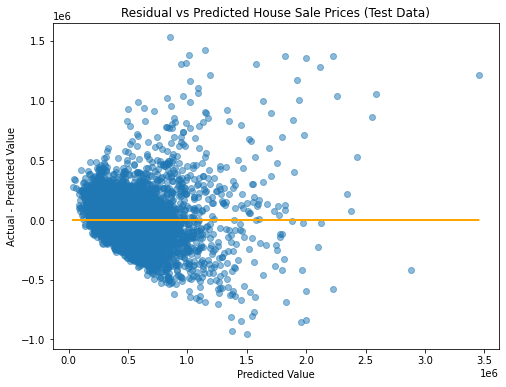

In [50]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(y_pred, residuals, alpha=0.5)
ax.plot(y_pred, [0 for i in range(len(X_test))], color='orange')
ax.set_title('Residual vs Predicted House Sale Prices (Test Data)')
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");
plt.savefig('figures/Homoscedasticity.png')

* The cone/funnel shape is observed on data.
* Funneling increases at high house sale prices.

I conclude that Homoscedasticity assumption is violated.

### Linear Regression Assumptions Conclusion

* Linearity assumption holds for the majority of the data, except outliers at high sale prices.
* Normality assumption holds for the majority of the data, except outliers at high sale prices.
* Independence Assumption is violated since significant multicollinearity is observed.
* I conclude that Homoscedasticity assumption is violated.

## Future Work
* Two of four linear regression assuptions failed. The others two also fail at high sale prices. I guess one of the main causes for the violations is outliers. For future work, I need to study outliers, and maybe remove from data.
* The correlation betweern sqft_living and yr_built is interesting. This needs to be investigated. The multicollinearity caused by their correlation affects the model. Should 'yr_built' be removed from model? Advantages and disadvantages?
* Apparently residual increases as the sale price increases. Homoscedasticity even observed at low house sale prices. How can we avoid it?